## Business Problem
Historically, gold had been used as a form of currency in various parts of the world including the USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

Fractional change in gold price may result in huge profit or loss for investors as well as government banks.
Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.


#### Business Objectives and Constraints
* To accurately predict the future adjusted closing price of Gold ETF (Exchang Traded Funds) across a given period of time in the future.
* The model should not take too long to return prediction (Latency concerns)
* To Maximize the Coefficient of determination (R2) as much as posible (the closer it is to 1 the better)
* To minimize the Root Mean Squared Error (RMSE) as much as posible (the closer it is to zero the better) 

#### Type of Machine Learning Problem
It is a Regression problem as the target variable (adjusted closing price) is a **continuous** value.

####  Performance Metric

- R^2 score (Coefficient of determination)
- RMSE (root mean squared error)

### Data Overview
- Data Source: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset <br><br>
- Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources.<br><br>
- The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.<br><br>
- The historical data of Gold ETF fetched from Yahoo finance has 7 columns, Date, Open, High, Low, Close, Adjusted Close, and Volume, the difference between Adjusted Close and Close is that the closing price of a stock is the price of that stock at the close of the trading day. Whereas the adjusted closing price takes into account factors such as dividends, stock splits, and new stock offerings to determine a value. So, Adjusted Close is the outcome variable which is the value you have to predict.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook", palette="coolwarm", style = 'ticks' ,font_scale = 1.2, color_codes=True)

## Loading Data

In [2]:
data = pd.read_csv("Project Dataset.zip") #change the file path as applicable to you
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


## Data Cleaning

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

### Sanitary check

In [4]:
#sanitory check to observe the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

#### Observation:
- No missing values
- The `Date` feature is of type `object`.

In [5]:
#converting the datatype of "Date" feature from "object" to "datetime"
data.Date = pd.to_datetime(data.Date, format="%Y-%m-%d" )

In [6]:
#checking for any missing values
data.isnull().values.any()

False

It is observed that `Close` and `Adj Close` are duplicates of each other as shown below, hence the need to drop one (`Close`)

In [7]:
data[['Close', 'Adj Close']].head()

,Close,Adj Close
0,152.330002,152.330002
1,155.229996,155.229996
2,154.869995,154.869995
3,156.979996,156.979996
4,157.160004,157.160004


In [8]:
#checking to see if features "Close" and "Adj Close" are duplicates
(data.Close.values == data['Adj Close'].values).all()

True

In [9]:
#droping the "Close" feature, since it's a duplicate of "Adj Close"
data.drop('Close', axis=1, inplace=True)

## Exploratory Data Analysis

In [10]:
data.tail()

,Date,Open,High,Low,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,8449400,249.559998,250.190002,247.470001,249.919998,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


### Transforming the dataframe into a time series by turning the "Date" feature to index

In [11]:
#Transform dataframe into a time series by turning the "Date" feature into index
data.set_index('Date', inplace=True)

### Plot of Gold price over time
Lets plot just the target variable against time and check for seasonality and trend (how the prices of gold varies over time)

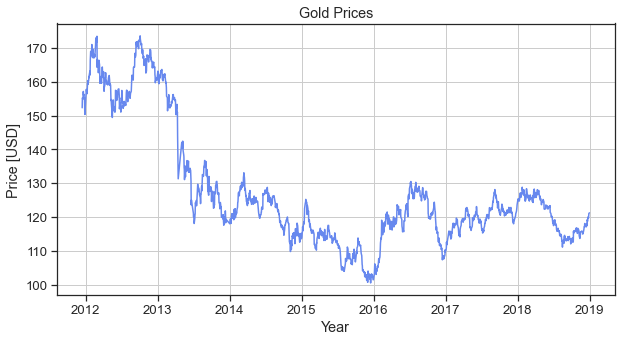

In [12]:
#data['Adj Close'].plot()
plt.figure(figsize=(10,5))
plt.plot(data['Adj Close'])
plt.xlabel('Year')
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Observation
Here we can clearly see that gold prices are very high in the time period of 2012 to 2013. And since then, there has been a general decline in the price till 2016, then a little rise between 2016 and late 2018 with some fluctuations in between.

### Zooming in to the last 3 years of data
Lets have a closer look at the trend for the last 3 years

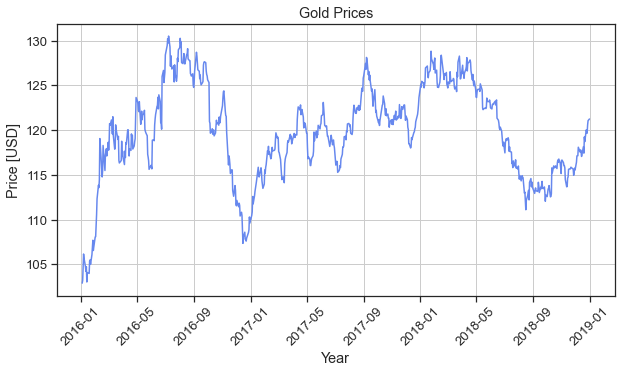

In [13]:
last_3_years = data['Adj Close'].loc[data.index>='2016-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_3_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Zooming in closer to the last 2 years of data
Lets have a closer look at the trend for the last 2 years, we may be able to see things more clearly

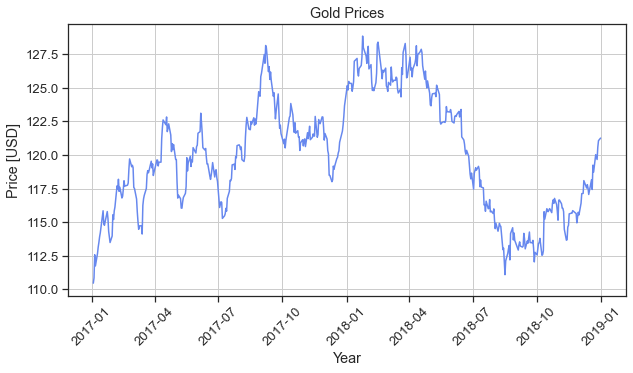

In [14]:
last_2_years = data['Adj Close'].loc[data.index>='2017-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_2_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Observation
As we zoom closer, we observed that there exist some level of seasonality in the Gold Prices and some seasonality are higher than others, hence the need to transform the seasonality into a stationary data by subtracting the previous seasonality from the current seasonality.

### Zooming in even closer to just last one year of data

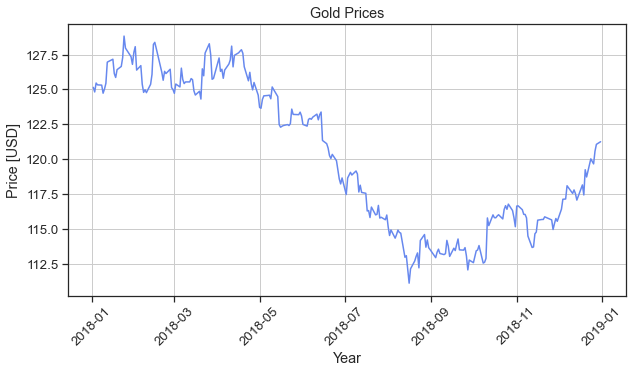

In [15]:
last_1_years = data['Adj Close'].loc[data.index>='2018-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_1_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Observation
Looking at the graph above, it can be seen that the first quarter (Jan to Apr) of 2018 recorded the highest and steady price of Gold for the year, after which there was a steady decline up till mid August, then increases a little and remain almost steady till around mid September before it then started recording a almost steady increace till the end of the year (2018). But on a high level note, 2018 recorded a general decreasing trend in Gold Price.

## AutoCorrelation:
Autocorrelation is the correlation of a point in the series with a point with lag (previous point) taken as one day of the same series. If a series show a positive autocorrelation then we say the series is **momentum** (trend following) and if the series shows a negative autocorrelation then we say the series is **mean reversing**. (Mean reversion is a financial term for the assumption that an asset's price will tend to converge to the average price over time, read more about **Mean reversion** [here](https://en.wikipedia.org/wiki/Mean_reversion_(finance)))

In python we can use pandas autocorr() function to calculate autocorrelation of a series.

In [16]:
#calculating the Autocorrelation of the "Adj Close" using the python's inbuild "autocorr()" function
print(data['Adj Close'].autocorr())

0.9974383274693523


### Observation
Here the autocorrelation value is positive and high (**0.997438**), hence we can conclude that the series is a trend following series.

## Percentage Change
Lets use the pct_change() function available in pandas to see how the prices of Gold changes over a time lag in days.
This is useful in comparing the percentage of change in a time series of elements.
This function by default calculates the percentage change from the immediately previous row. It output first row as NaN so we have to apply dropna(). Here we test percent change in gold price to check that series is a random walk or not.

In [17]:
from statsmodels.tsa.stattools import adfuller
time_period = 20
results = adfuller(data['Adj Close'].pct_change(periods=time_period).dropna())
print(f'The % change of any current price from the last {time_period} days is: {round(results[1], 6)*100}%')

The % change of any current price from the last 20 days is: 0.0015%


### Observation on the percentage change
The percentage change of any current price with that of 20 days ago is: 0.002%, which is a strong indication that the price of Gold at any given time $\tau$ is not a random walk but a function of trend. Hence we may want to experiment by trying to predict the Gold price using just the trend information (with the help of **Autoregressive models**), then compare the result with the prediction that takes into account other features.

## Correlation of features to the target ("Adj Close")

In [18]:
#checking for correlation between features and target variable
corr_data = data.corr().abs()['Adj Close'].sort_values(ascending=False)
corr_data

Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
GDX_Low       0.975561
                ...   
PLD_Trend     0.026536
USB_Trend     0.025933
EU_Trend      0.019913
USDI_Trend    0.016641
PLT_Trend     0.011355
Name: Adj Close, Length: 79, dtype: float64

### Visualizing the correlation of features to the target

## Making a dataframe of highly correlated features

In [19]:
#selecting features that are highly correlated with the target variable "Adj Close"
high_corr_features = list(corr_data[corr_data >= 0.3].index)
high_corr_features.insert(0, 'Date')

high_corr_df = data.reset_index()[high_corr_features]
high_corr_df.set_index('Date', inplace=True)
high_corr_df.head(2)

,Adj Close,High,Low,Open,GDX_Low,GDX_Close,GDX_High,GDX_Adj Close,GDX_Open,SF_Low,...,EU_high,EU_Price,EU_open,EU_low,GDX_Volume,USB_High,USO_Volume,USB_Price,USB_Open,USB_Low
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,152.330002,154.949997,151.710007,154.740005,51.570000,51.68,53.139999,48.973877,53.009998,52316,...,1.3051,1.3018,1.2982,1.2957,20605600,1.911,12616700,1.911,1.911,1.911
2011-12-16,155.229996,155.369995,153.899994,154.309998,52.040001,52.68,53.180000,49.921513,52.500000,52890,...,1.3087,1.3035,1.3020,1.2997,16285400,1.851,12578800,1.851,1.851,1.851


## Splitting the data into Train and Test sets
Since it is a time series data, it will be splited on the time axis in order to avoid data leakage.

In [20]:
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

features_data = high_corr_df
target = data['Adj Close']


### Splitting the Train data further for training and cross validation 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features_data, target, test_size=0.35, shuffle=False)

## Data Normalization

In [22]:
scaler = MinMaxScaler()
normalized_feature = scaler.fit_transform(features_data)

## Feature Engineering

## Modelling

In [23]:
#Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

#Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

#xgboost regressor 
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

#Decision Tree Reg
Decision_Tree_Reg = DecisionTreeRegressor().fit(x_train, y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.63294e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+03, tolerance: 4.654e+01
  model = cd_fast.enet_coordinate_descent(


In [24]:
models = [['Linear Reg: ',  linear_model],['Lasso: ', lasso_reg],['Ridge: ', ridge_reg],['XGBR:', xgbr],['Dec_Tree_Reg:', Decision_Tree_Reg]]

## Model Evaluation

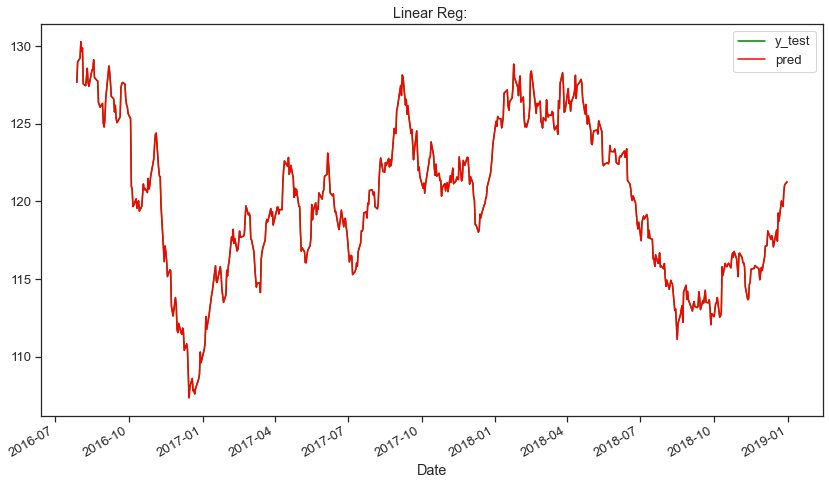

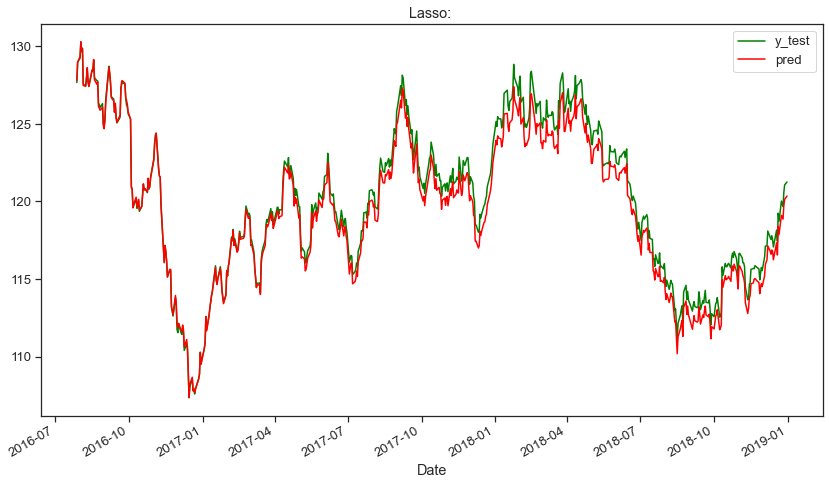

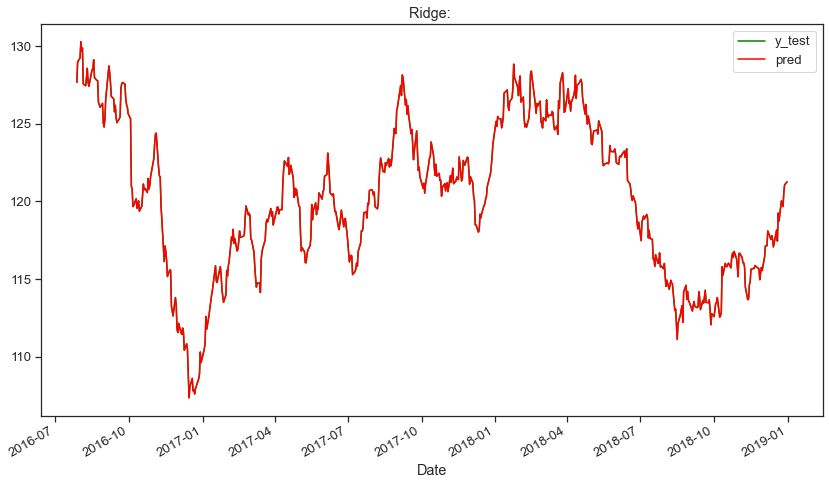

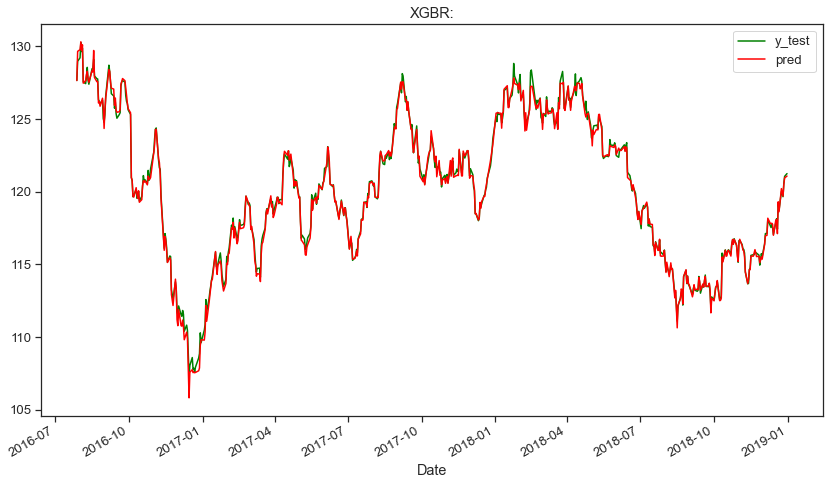

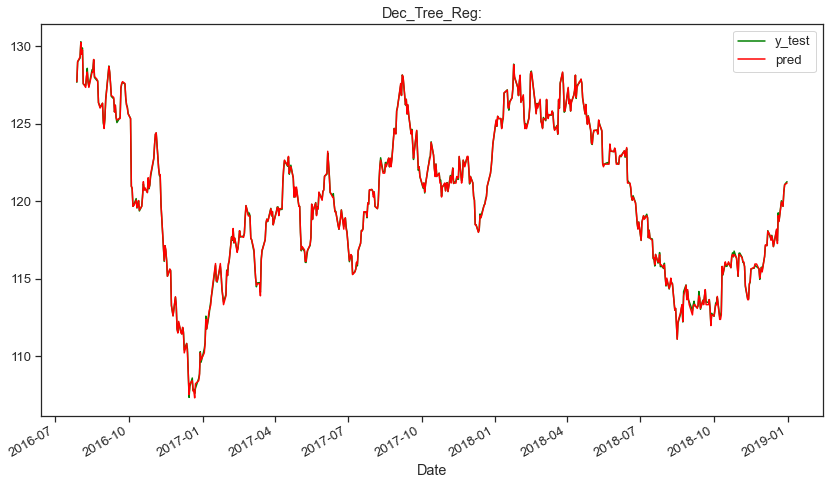

In [25]:
model_data = []

for name,curr_m in models:
    c_model = {}
    pred = curr_m.predict(x_test)
    c_model["Name"] = name
    
    c_model["R2"] = r2_score(y_test,pred)
    c_model['RMSE'] = np.sqrt(mean_squared_error(y_test,pred))

    pred = pd.Series(pred, index = y_test.index)
    plt.figure(figsize=(14,8))
    y_test.plot.line(label = 'y_test', color="green")
    pred.plot.line(label = 'pred', color="red")
    plt.title(name)
    plt.legend()
    plt.show()

    model_data.append(c_model)

## Comparison (Tabular form)

In [26]:
fid = pd.DataFrame(model_data)
round(fid,4)

,Name,R2,RMSE
0,Linear Reg:,1.0000,0.0000
1,Lasso:,0.9728,0.8040
2,Ridge:,1.0000,0.0031
3,XGBR:,0.9965,0.2878
4,Dec_Tree_Reg:,0.9997,0.0818


<AxesSubplot:title={'center':'METRICS'}, xlabel='Name'>

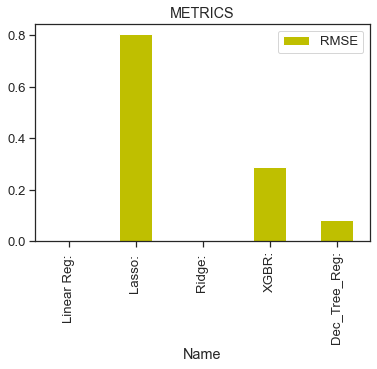

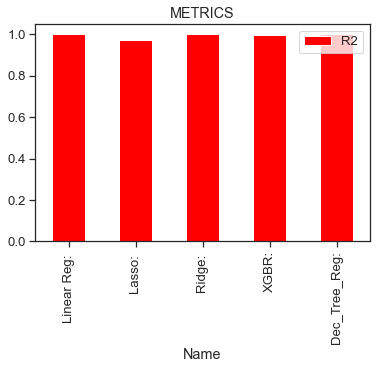

In [27]:
fid.plot(x="Name", y=['RMSE'], kind="bar" , title = 'METRICS', color='y')
fid.plot(x="Name", y=['R2'], kind="bar" , title = 'METRICS', color='r')